In [1]:
import numpy as np
import pandas as pd
import dask.bag as db
import dask.dataframe as dd
from plotnine import *

In [2]:
def group_date(d):
    #d=pd.to_datetime(date)
    semester_table=('1','1','1','1','1','1','2','2','2','2','2','2')
    return str(d.year) + "-" + semester_table[d.month - 1]
def group_elapsed(d1, d2):
    delta = d2 - d1
    return delta.days

In [3]:
df = dd.read_csv('Users.csv', usecols=[2,3])
df = df.astype({'CreationDate': 'datetime64', 'LastAccessDate': 'datetime64'})
#df.info()

In [4]:
df['Group']=df.apply(lambda row: group_date(row['CreationDate']), axis=1)
df_group=df.groupby(df['Group']).count().compute()
df_group.info()

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\core.py:3000: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2008-2 to 2018-2
Data columns (total 2 columns):
CreationDate      21 non-null int64
LastAccessDate    21 non-null int64
dtypes: int64(2)
memory usage: 504.0+ bytes


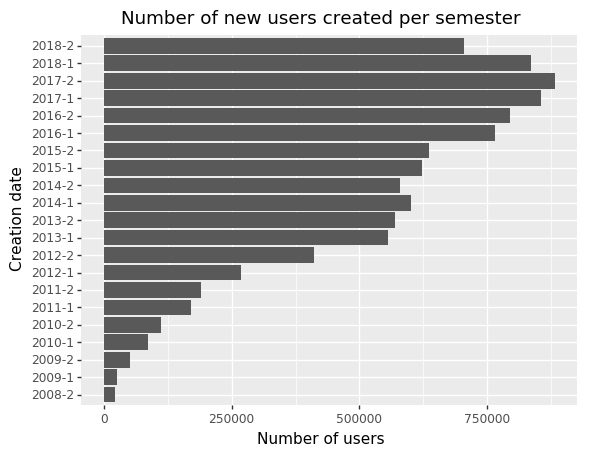

<ggplot: (-9223371876022797217)>

In [5]:
plot = ggplot(df_group, aes(x=df_group.index, y='CreationDate'))
plot += geom_col()
plot += ggtitle("Number of new users created per semester")
plot += ylab("Number of users")
plot += xlab("Creation date")
plot += coord_flip()
plot

In [ ]:
df2=df[df['CreationDate'] != df['LastAccessDate']]
df2['Elapsed']=df.apply(lambda row: group_elapsed(row['CreationDate'],row['LastAccessDate']), axis=1)
df_group=df2.groupby(df2['Elapsed']).count().compute()
df_group.head()

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\core.py:3000: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


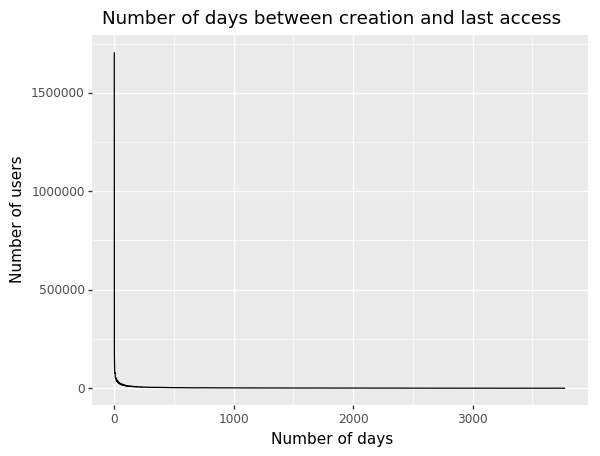

<ggplot: (160829683271)>

In [13]:
plot = ggplot(df_group, aes(x=df_group.index, y='LastAccessDate'))
plot += geom_line()
plot += ggtitle("Number of days between creation and last access")
plot += ylab("Number of users")
plot += xlab("Number of days")
#plot += coord_flip()
plot